In [1]:
import tifffile as tf
import numpy as np
from skimage.feature import peak_local_max
from skimage.filters import gaussian
from matplotlib import pyplot as plt
from trapanalysis import TrapGetter
import matplotlib

/home/mjsf3/anaconda3/envs/trapenv/lib/python3.6/site-packages/tifffile/tifffile.py:2236: UserWarning: ome-xml: not an ome-tiff master file
  warnings.warn('ome-xml: not an ome-tiff master file')


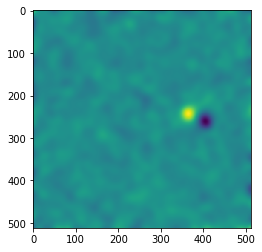

frame number  145


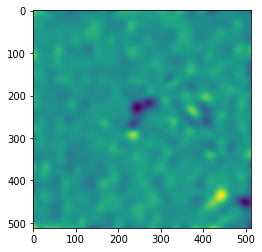

frame number  185


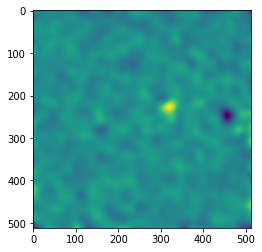

frame number  196


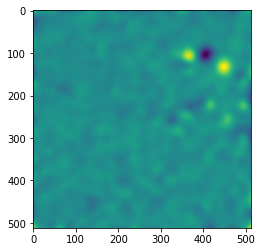

frame number  214


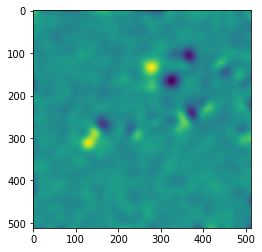

frame number  215


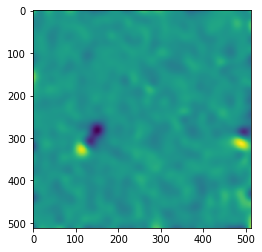

frame number  216


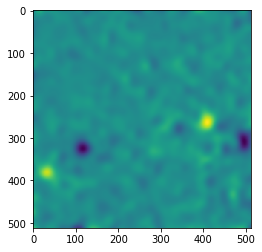

frame number  217


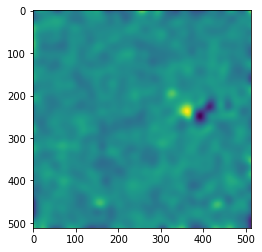

frame number  224


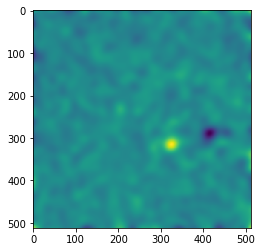

frame number  236


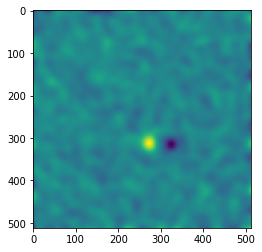

frame number  237


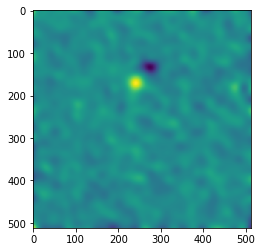

frame number  242


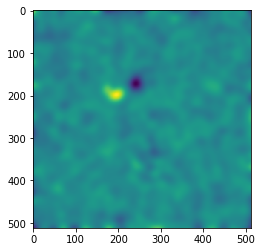

frame number  246


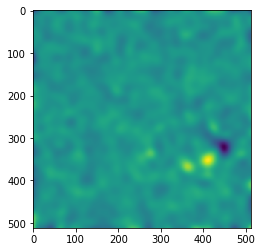

frame number  257


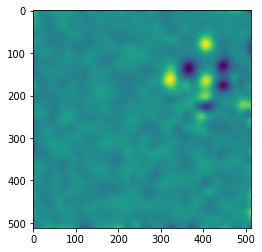

frame number  259


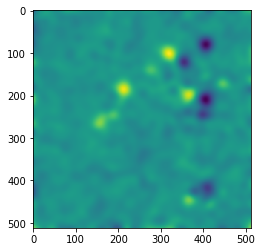

frame number  260


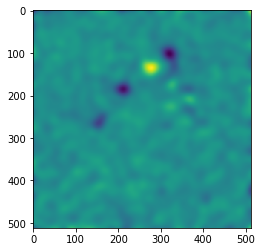

frame number  261


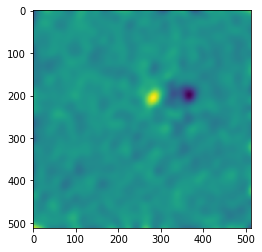

frame number  262


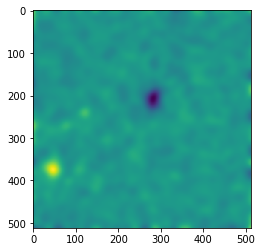

frame number  263


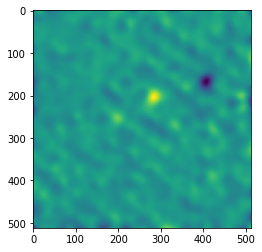

frame number  274


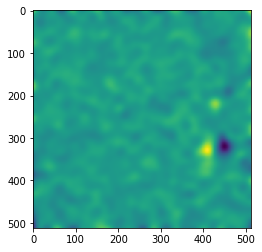

frame number  281


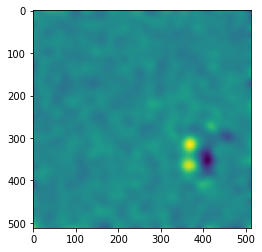

frame number  282


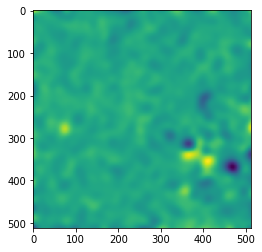

frame number  290


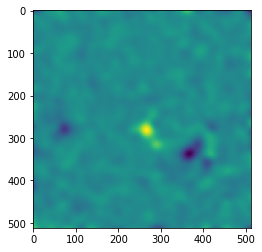

frame number  291


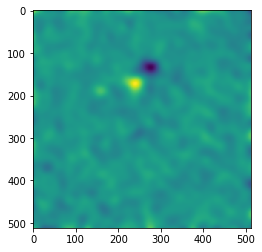

frame number  301


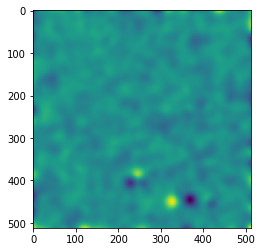

frame number  310


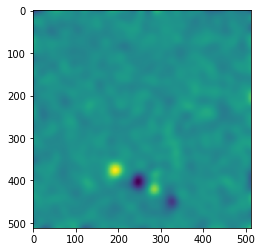

frame number  311


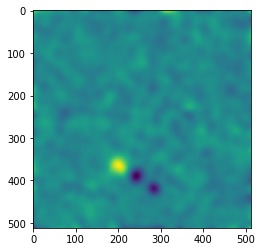

frame number  313


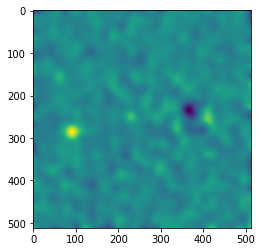

frame number  314


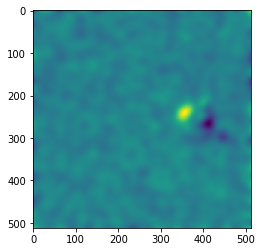

frame number  324


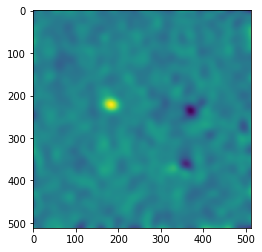

frame number  328


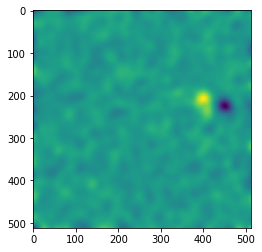

frame number  332


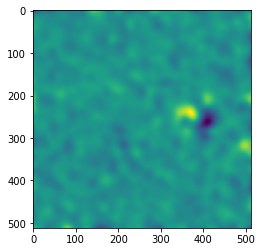

frame number  340


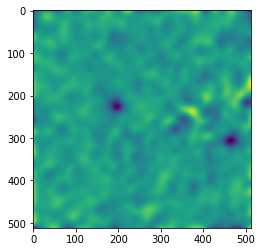

frame number  353


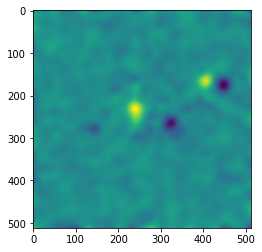

frame number  355


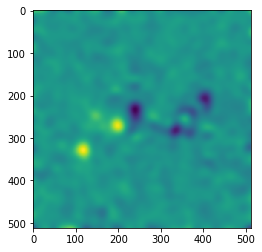

frame number  356


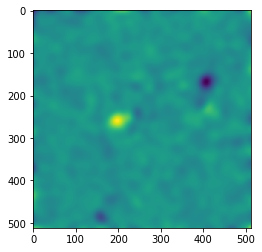

frame number  374


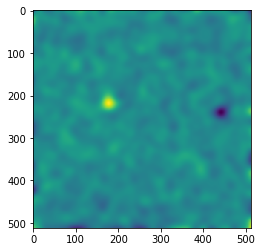

frame number  397


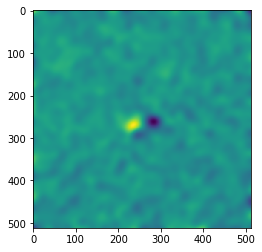

frame number  415


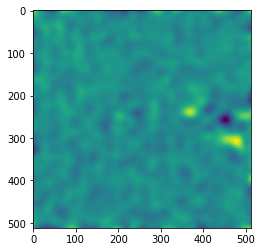

frame number  419


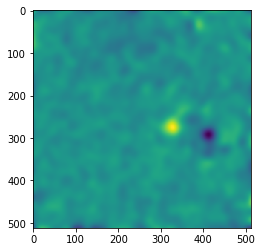

frame number  483


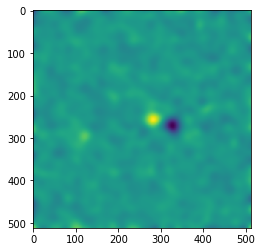

frame number  484


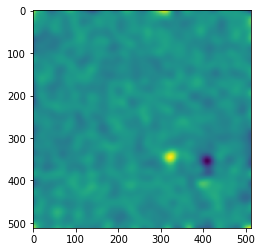

frame number  495


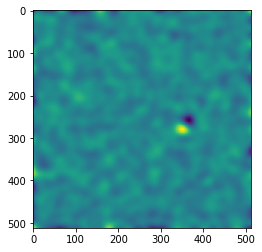

frame number  511


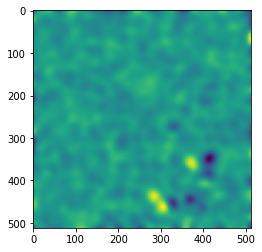

frame number  539


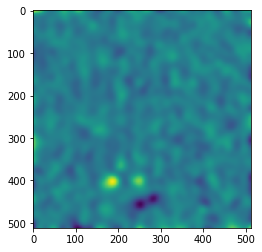

frame number  564


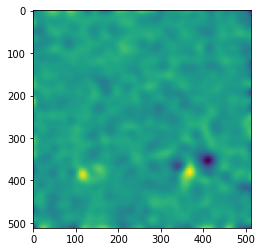

frame number  582


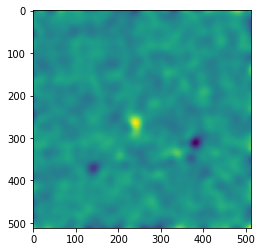

frame number  628


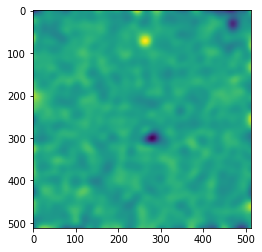

frame number  683


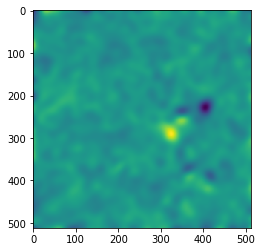

frame number  692


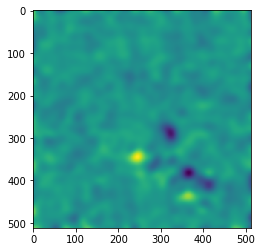

frame number  693


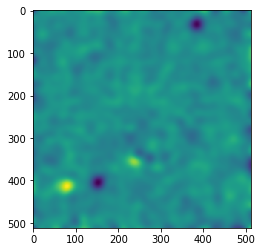

frame number  694


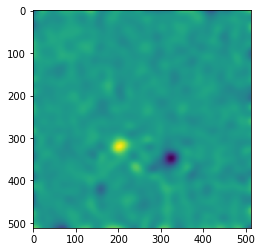

frame number  759


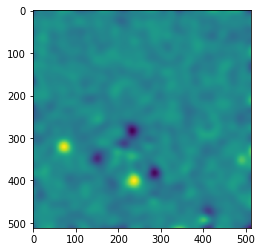

frame number  760


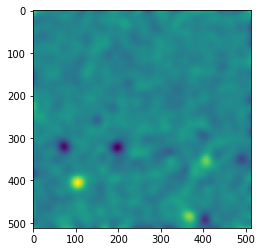

frame number  761


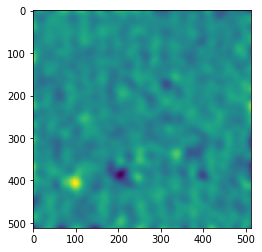

frame number  763


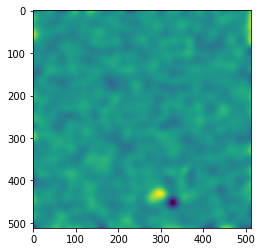

frame number  780


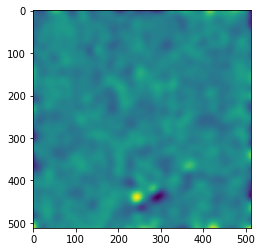

frame number  781


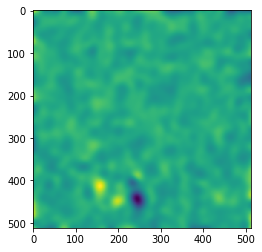

frame number  782


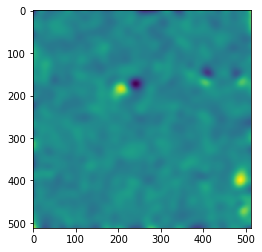

frame number  796


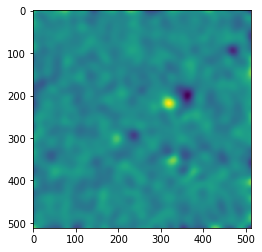

frame number  803


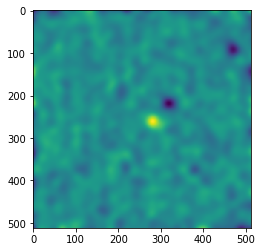

frame number  804


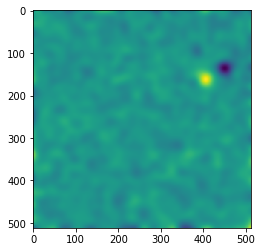

frame number  810


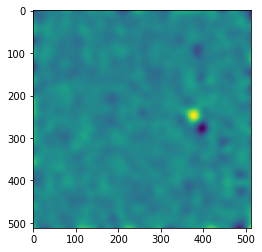

frame number  817


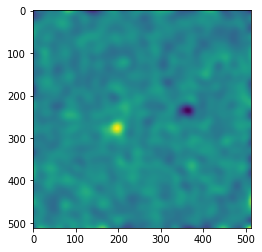

frame number  819


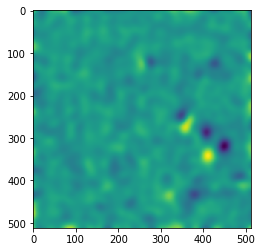

frame number  827


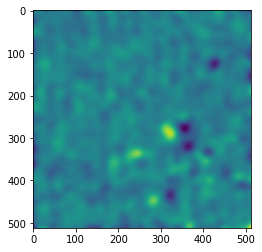

frame number  828


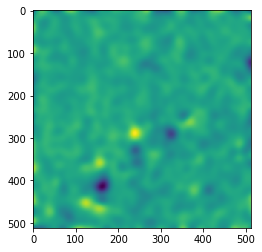

frame number  833


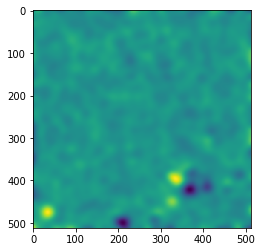

frame number  849


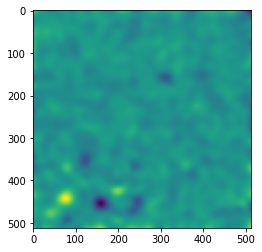

frame number  858


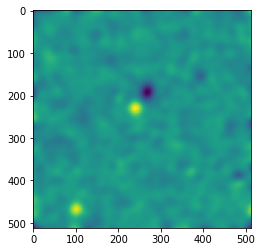

frame number  865


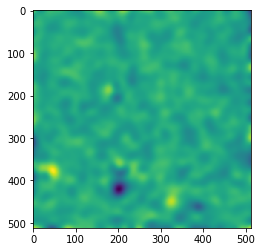

frame number  873


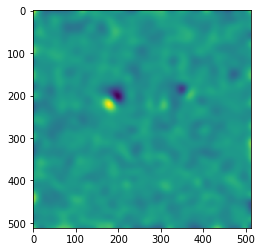

frame number  893


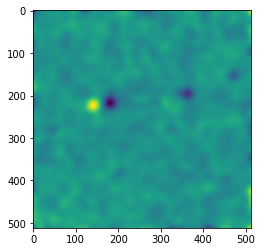

frame number  894


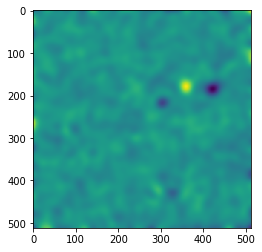

frame number  904


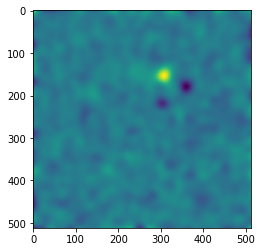

frame number  905


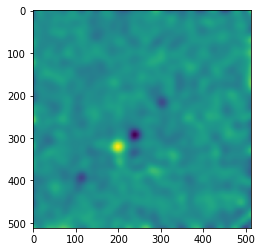

frame number  908


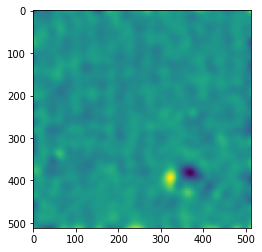

frame number  926


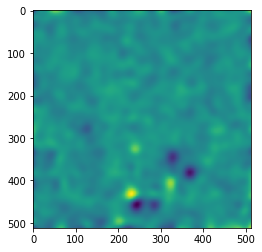

frame number  928


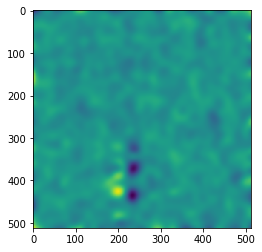

frame number  929


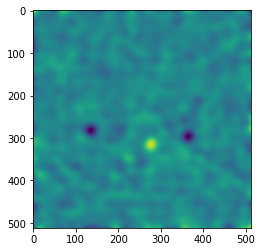

frame number  952


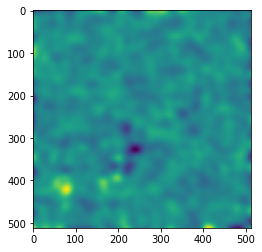

frame number  955


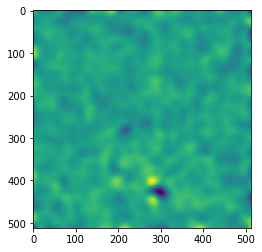

frame number  959


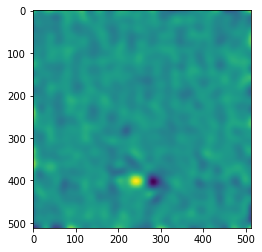

frame number  960


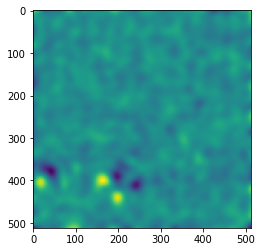

frame number  964


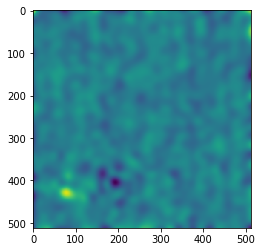

frame number  966


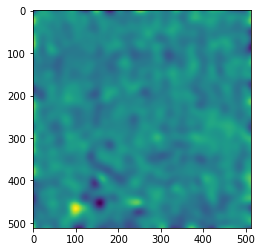

frame number  992


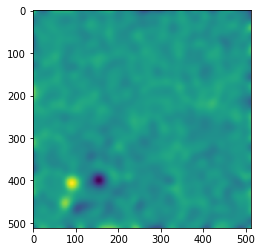

frame number  993


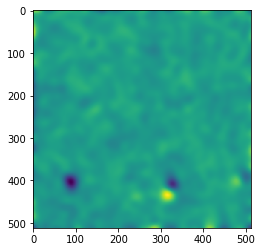

frame number  994


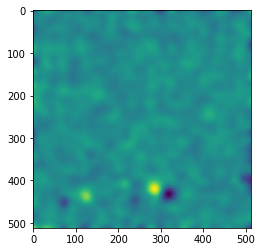

frame number  995


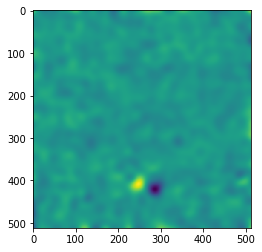

frame number  996


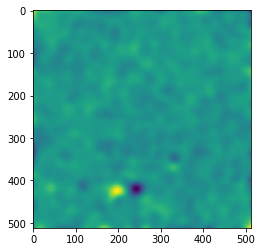

frame number  999


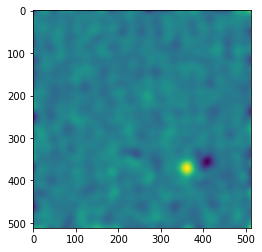

frame number  1019


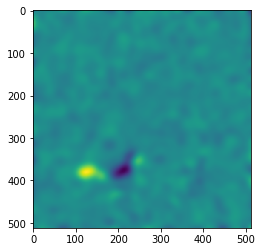

frame number  1022


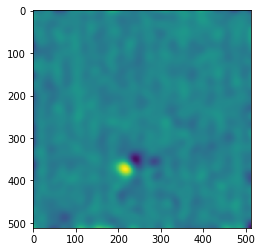

frame number  1025


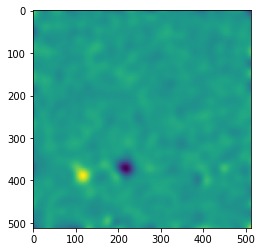

frame number  1026


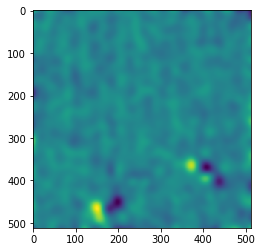

frame number  1041


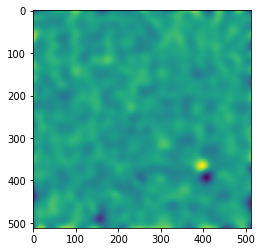

frame number  1042


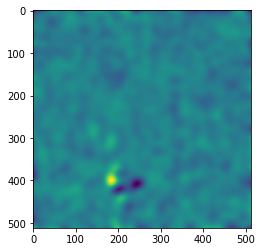

frame number  1083


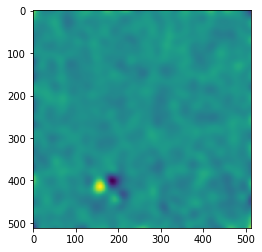

frame number  1084


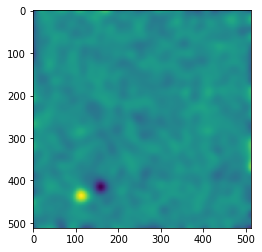

frame number  1086


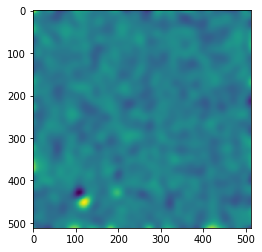

frame number  1094


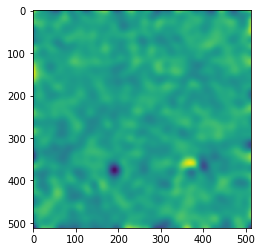

frame number  1112


In [2]:
tif = tf.TiffFile('/storage/All data- for analysis/CecB/5uM/260522_CecB-  PCPG vesicles- after flushing_1_MMStack_Pos1.ome.tif')

frames = tif.asarray()

subtracted_frames = frames[:-1] - frames[1:]


interficiendum = None
for frame_index in range(126,1326):
    frame = subtracted_frames[frame_index]
    
    frame = gaussian(frame,10)
    pos_peaks = peak_local_max(frame,min_distance=40,threshold_rel=0.95)
    neg_peaks = peak_local_max(np.max(frame)-frame,min_distance=40,threshold_rel=0.95)
    
    pos_peaks = np.array(pos_peaks)
    neg_peaks = np.array(neg_peaks)
    
    
    
    peaks = np.vstack((pos_peaks,neg_peaks))
    
    
    if len(pos_peaks) >0 and len(neg_peaks) > 0:
        
        #if we find a positive and a negative peak in the subtracted frame, we believe that a vesicle has moved
        #remains to pair the negative peak and positive peak to make sure a vesicle moved and didnt just burst
        
        #pair_vectors = pos_peaks[np.newaxis] - neg_peaks
        #print(pair_vectors.shape)
        #if pair_vectors.shape[1] ==1:
        plt.imshow(frame)
        plt.show()
        print('frame number ', frame_index)
            #print('frame of movement ', frame_index)
            #if interficiendum is None:
            #    interficiendum = neg_peaks
        '''   print(neg_peaks)
                print(interficiendum)
            else:
                interficiendum = np.vstack((interficiendum,neg_peaks))
                
        else:
            pair = pair_vectors[np.absolute(pair_vectors[:,:,0]) < 60]
            print(pair_vectors[:,:,0])
            
            if pair_vectors.shape[1] == 1:
                plt.imshow(frame)
                plt.show()
                print('frame of movement ', frame_index)
                if interficiendum is None:
                    interficiendum = neg_peaks[pair_vectors[:,0] < 60]
                    
                else:
                    interficiendum = np.vstack(interficiendum,neg_peaks[pair_vectors[:,0] < 60])  
                    
            else:
                pair = pair_vectors[pair_vectors[:,:,1] < 0]
                pair = pair[pair[:,0] < 60]
                
                #if there is at least a pair of positive and negative peaks which are vertically less than 60 pixels away and arranged horizontally so the positive peak is on the left
                 #then we choose to bin the vesicle which in the previous frame was in the position of the nearest negative peak to a positive peak
                    
                if len(neg_peaks) > 1 and len(pair[0]) > 0:
                    print(pair_vectors[:,:,0])
                    print([np.absolute(pair_vectors[:,:,0]) == np.min(np.absolute(pair_vectors[:,:,0]))][0])
                    peak = neg_peaks[[np.absolute(pair_vectors[:,:,0]) == np.min(np.absolute(pair_vectors[:,:,0]))][0][0]]
                    
                else:
                    peak = neg_peaks                    
                
                    
                plt.imshow(frame)
                plt.show()
                print('frame of movement ', frame_index)
                if interficiendum is None:
                    interficiendum = peak
                else:
                    interficiendum = np.vstack((interficiendum,peak))
                        
            '''


In [3]:
TG = TrapGetter()
initial_detect_frame = 126
frame = tif.asarray(key = initial_detect_frame)

TG.get_vesicle_positions(frame)
TG.remove_duplicates()
TG.trap_positions += [0,5]

separations = TG.trap_positions[:,:,np.newaxis] - interficiendum.T
separations = np.linalg.norm(separations,axis = 1)

16638 245506
1875.48009756794
First sight of traps counted  99
after removing the duplicates we find  79


AttributeError: 'NoneType' object has no attribute 'T'

In [18]:
killlabels = TG.labels[np.sum(separations < np.sqrt(2*15**2), axis = 1) == True]
killlabels

array([19, 35, 37])

In [4]:
image_diff = tif.asarray(496)-tif.asarray(495)

In [5]:
smooth_image_diff = gaussian(image_diff,6)

In [3]:
%matplotlib qt

In [32]:
plt.figure()
plt.imshow(smooth_image_diff)

In [23]:
matplotlib.rcParams.update({'xtick.major.size':6}) #length of ticks
matplotlib.rcParams.update({'ytick.major.size':6})
matplotlib.rcParams.update({'lines.markeredgewidth':2}) #width of ticks
matplotlib.rcParams.update({'lines.markersize':6}) 

plt.style.use('classic')


%matplotlib qt
fig,ax = plt.subplots(1,1)


In [12]:
ax.plot(smooth_image_diff[349,:])

In [13]:
from scipy.ndimage import gaussian_filter1d


In [24]:
plot = gaussian_filter1d(smooth_image_diff[349,:],15)

In [25]:
ax.plot(plot)

In [26]:
fig.set_facecolor('w')

In [27]:
plt.savefig('/storage/FiguresforReport/Forgettingvals.png')

In [30]:
ax.set_yticklabels(8*[''])

[Text(0, 0.30000000000000004, ''),
 Text(0, 0.35000000000000003, ''),
 Text(0, 0.4, ''),
 Text(0, 0.45000000000000007, ''),
 Text(0, 0.5, ''),
 Text(0, 0.55, ''),
 Text(0, 0.6000000000000001, ''),
 Text(0, 0.6500000000000001, '')]

In [31]:
smooth_image_diff

array([[0.33396561, 0.35955144, 0.38362405, ..., 0.60153305, 0.62784942,
        0.65447818],
       [0.34050915, 0.36502508, 0.38819296, ..., 0.58620732, 0.61072975,
        0.63550283],
       [0.34748924, 0.37090644, 0.39313707, ..., 0.57028686, 0.59286408,
        0.61562665],
       ...,
       [0.30440841, 0.31813225, 0.33184182, ..., 0.3623011 , 0.3649201 ,
        0.36822467],
       [0.29489134, 0.31039168, 0.32577553, ..., 0.33422346, 0.33596254,
        0.33851292],
       [0.28603972, 0.30331009, 0.32035983, ..., 0.30491595, 0.30550103,
        0.30701442]])

In [19]:
matplotlib.rcParams.update({'xtick.major.size':6}) #length of ticks
matplotlib.rcParams.update({'ytick.major.size':6})
matplotlib.rcParams.update({'lines.markeredgewidth':2}) #width of ticks
matplotlib.rcParams.update({'lines.markersize':6}) 

plt.style.use('classic')
fig, ax = plt.subplots(1,1)

In [20]:
tif = tf.TiffFile('/storage/All data- for analysis/CecB/5uM/260522_CecB-  PCPG vesicles- after flushing_1_MMStack_Pos1.ome.tif')


In [23]:
ax.imshow(gaussian(tif.asarray(626)-tif.asarray(625),6),cmap='cividis')

In [22]:
ax.set_axis_off()
fig.set_facecolor('w')